# Clase 7
## Entrenamiento de modelos
### Regresión polinomial

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
# Cargar los datos y visualizarlos
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Crear gráfico de dispersión para inspeccionar el comportamiento
fig = px.scatter(df, x='total_bill', y='tip')
fig.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparación de datos
x = df['total_bill'].values.reshape((-1,1))
y = df['tip']

# Establecer grado del polinomio
grado = 4

# Crear transformador polinomial
poly = PolynomialFeatures(degree=grado)

# Transformar X
x_poly = poly.fit_transform(x)

# Crear modelo
modelo = LinearRegression()

# Entrenar modelo
modelo.fit(x_poly, y)

# Realizar predicción
print('Total bill: Q 40', modelo.predict(poly.transform([[40]])))

Total bill: Q 40 [4.27402313]


In [ ]:
# Crear rango de valores para graficar la curva polinómica
x_range = np.linspace(x.min(), x.max(), 200).reshape(-1,1)
y_range = modelo.predict(poly.transform(x_range))


# Curva polinómica
fig.add_trace(
    go.Scatter(
        x=x_range.flatten(),
        y=y_range,
        mode='lines',
        name=f'Regresión polinomica grado {grado}',
        line=dict(width=3)
    )
)

fig.show()


## Árbol de decisión

In [ ]:
# Cargar los datos y visualizarlos
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [ ]:
# Conteo de las variables unicas
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50



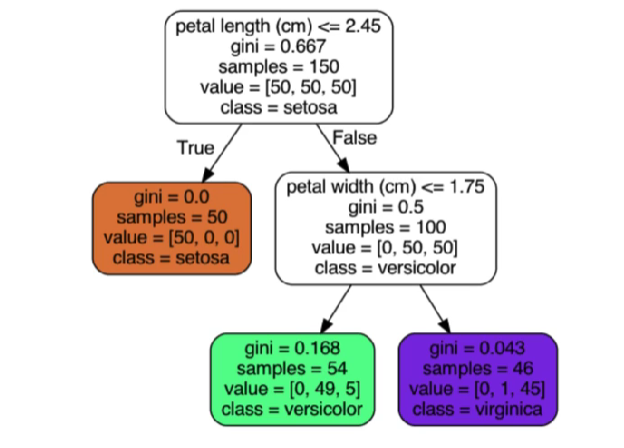

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Separar variables predictoras y objetivo
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_id']

# Dividir en train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)


# Predicciones
y_pred = model.predict(x_test)
y_pred

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1])

In [ ]:
y_test

,species_id
73,2
18,1
118,3
78,2
76,2
31,1
64,2
141,3
68,2
82,2


### Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification      # Para generar un dataset de ejemplo
import numpy as np
import pandas as pd

# Creamos un dataset simulado: 500 estudiantes, 10 características, 2 clases (riesgo/no riesgo)
caracteristicas_estudiantes, riesgo = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# Dividimos los datos en entrenamiento (75%) y prueba (25%)
x_train, x_test, y_train, y_test = train_test_split(
    caracteristicas_estudiantes, riesgo, test_size=0.25, random_state=42
)

# Creamos el modelo Random Forest
modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

# Entrenamos el modelo con los datos de entrenamiento
modelo.fit(x_train, y_train)

# Predicciones
y_pred = modelo.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [3]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [4]:
caracteristicas_estudiantes

array([[ 0.9934673 ,  1.07120049,  0.59256727, ...,  0.45057434,
        -2.84477883, -0.7508182 ],
       [ 0.59676717, -1.76826146, -0.49757084, ..., -0.2807337 ,
         1.0303383 ,  0.7202852 ],
       [ 0.67382231,  0.20117943,  0.41820576, ...,  0.55879168,
         1.68283288,  0.00949197],
       ...,
       [-1.3929615 ,  1.96708737,  1.79872502, ...,  1.01492622,
        -2.472596  ,  0.75326029],
       [ 2.75665964, -0.31246286,  0.75109945, ...,  0.99442056,
        -1.79834494, -2.00139268],
       [ 1.50220752,  0.72864795, -0.31823753, ...,  0.76396443,
        -1.14679733, -1.79776082]])

### Naive Bayes
El modelo Naive Bayes es un algoritmo de clasificación supervisado sencillo y potente que predice la probabilidad de que una instancia pertenezca a una clase, basándose en el Teorema de Bayes y una suposición "ingenua" (naive) de independencia entre sus características (variables).

* Calcula la probabilidad de una clase dado un conjunto de características, ajustando las creencias iniciales con la nueva evidencia.
* Asume que las características son independientes entre sí. Por ejemplo, en un correo spam, la presencia de "oferta" no influye en la probabilidad de que aparezca "gratis", lo cual no es realista pero facilita el modelo.
* Se entrena con datos etiquetados para aprender patrones de clasificación.

In [6]:
from sklearn.naive_bayes import GaussianNB

# Leemos el dataset
df = pd.read_csv('Naive-Bayes-Classification-Data.csv')
#df.head()

# Preparar los datos
x = df[['glucose', 'bloodpressure']]
y = df['diabetes']

# Dividimos los datos en entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Creamos el modelo Naive Bayes
modelo = GaussianNB()

# Entrenamos el modelo con los datos de entrenamiento
modelo.fit(x_train, y_train)

# Predicciones
y_pred = modelo.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0])

In [7]:
y_test

,diabetes
920,1
525,1
567,1
657,0
633,0
...,...
486,0
451,1
65,0
141,0
